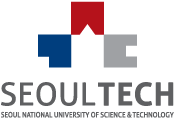

# Lab Session \# 04
---

by Prof. Josué Obregón <br>
Data Analysis for Electronic Manufacturing <br>
Department of Data Science - SeoulTech<br>

## Objective

The objectives of this lab session are as follows:

1.   Introduce [Seaborn](https://seaborn.pydata.org/), a high level visualization library that is used for creating visualization plots that are useful for doing Exploratory Data Analysis (EDA).

2. Introduce the student to different data visualization techniques for helping to understand the characteristics and behavior of the target variable in predictive models.

3. Likewise, the techniques are also useful for understanding the relationship of the predictor variables in two ways, between themselves and with the target variable.

The analysis presented in this labsession is based on [Chapter 4](http://www.feat.engineering/exploratory-visualizations.html) of the **Feature book engineering and selection: A practical approach for predictive models**. You can check it out for a more detailed explanation of the analysis process.

## Importing libraries and uploading data to various pandas DataFrames


The libraries that we will import to start with are pandas and numpy for data handling, and matplotlib and seaborn for generating visualizations.

Data were obtained from [Chicago data portal](https://data.cityofchicago.org/Transportation/CTA-Ridership-L-Station-Entries-Daily-Totals/5neh-572f).

The data needs some preprocessing, but that is not the point of this Lab Session, so I am including two extra files. The first is where the days used for the analysis are recorded, and the second are attributes created by the author of the book.

In [1]:
!pip install --upgrade seaborn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
!mkdir data

In [4]:
import gdown

urls = ['https://drive.google.com/uc?export=download&id=1GiEi6LVHBAAX4IWVA2gRH1gJZ1vLYghG', # chicago_train_data  https://drive.google.com/file/d/1GiEi6LVHBAAX4IWVA2gRH1gJZ1vLYghG/view?usp=sharing
        'https://drive.google.com/uc?export=download&id=1LIK0YFER5ve9Wn7Uap4Zb6f5pXcAExZ-', # train_days   https://drive.google.com/file/d/1LIK0YFER5ve9Wn7Uap4Zb6f5pXcAExZ-/view?usp=sharing
        'https://drive.google.com/uc?export=download&id=18pIOZQXBOSwT-t69icoGZgZh-kUUFMrN', # extra data chicago https://drive.google.com/file/d/18pIOZQXBOSwT-t69icoGZgZh-kUUFMrN/view?usp=sharing
        'https://drive.google.com/uc?export=download&id=13ofbMM3hiY44MlHmWWQw9_6WGGoV4J4o', # chichago_gas_prices https://drive.google.com/file/d/13ofbMM3hiY44MlHmWWQw9_6WGGoV4J4o/view?usp=sharing
        'https://drive.google.com/uc?export=download&id=1Zd_v6ufxJ8FEHSVgq9jKQbpPu5dW1rFX' # https://drive.google.com/file/d/1Zd_v6ufxJ8FEHSVgq9jKQbpPu5dW1rFX/view?usp=sharing
        ]
outputs = ['chicago_train_data.csv','train_days.csv' ,
           'extra_data_chicago.csv','chicago_gas_prices.csv',
           'lag_14_data.csv']
for url,output in zip(urls,outputs):
  gdown.download(url, f'data/{output}', quiet=False)

Downloading...
From: https://drive.google.com/uc?export=download&id=1GiEi6LVHBAAX4IWVA2gRH1gJZ1vLYghG
To: /content/data/chicago_train_data.csv
100%|██████████| 38.2M/38.2M [00:00<00:00, 112MB/s]
Downloading...
From: https://drive.google.com/uc?export=download&id=1LIK0YFER5ve9Wn7Uap4Zb6f5pXcAExZ-
To: /content/data/train_days.csv
100%|██████████| 107k/107k [00:00<00:00, 23.9MB/s]
Downloading...
From: https://drive.google.com/uc?export=download&id=18pIOZQXBOSwT-t69icoGZgZh-kUUFMrN
To: /content/data/extra_data_chicago.csv
100%|██████████| 1.32M/1.32M [00:00<00:00, 129MB/s]
Downloading...
From: https://drive.google.com/uc?export=download&id=13ofbMM3hiY44MlHmWWQw9_6WGGoV4J4o
To: /content/data/chicago_gas_prices.csv
100%|██████████| 14.2k/14.2k [00:00<00:00, 26.9MB/s]
Downloading...
From: https://drive.google.com/uc?export=download&id=1Zd_v6ufxJ8FEHSVgq9jKQbpPu5dW1rFX
To: /content/data/lag_14_data.csv
100%|██████████| 4.25M/4.25M [00:00<00:00, 76.4MB/s]


In [5]:
df = pd.read_csv('data/chicago_train_data.csv', parse_dates=True, index_col=2)
train_days = pd.read_csv('data/train_days.csv',index_col=1, parse_dates=True)
extra_data = pd.read_csv('data/extra_data_chicago.csv',index_col=0, parse_dates=True)

# Visualization of continuous variables

## Box Plots, Violin Plots, Histograms and Density Plots

In [6]:
sns.set_style("darkgrid") # Others whitegrid, white, dark, ticks https://www.python-graph-gallery.com/104-seaborn-themes

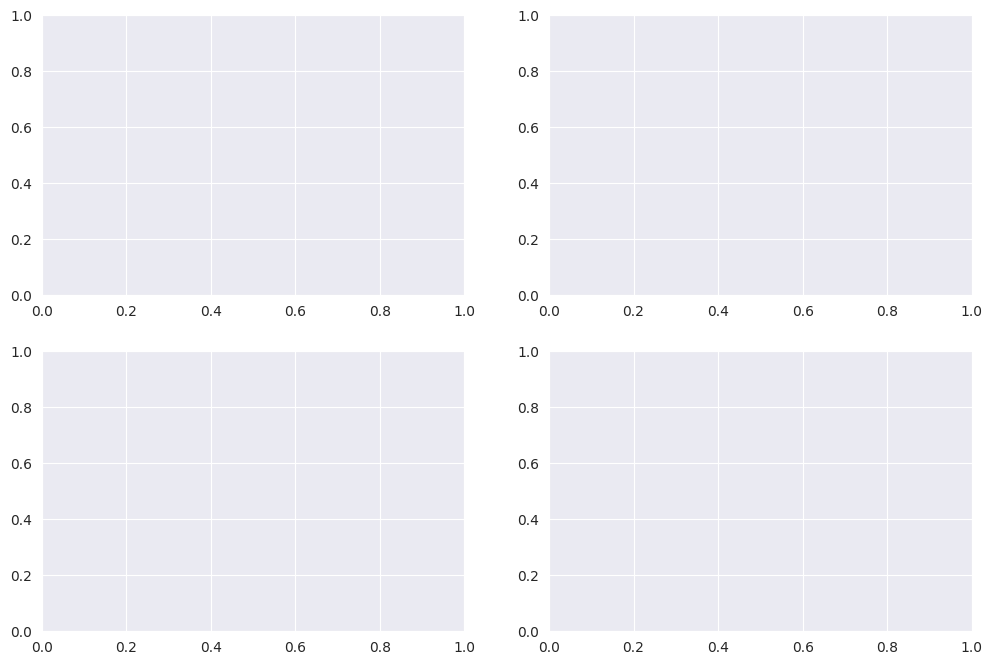

In [7]:
fig, axs = plt.subplots(2,2, figsize=(12,8)) #create grid


### Increasing visualizations with facets, colors and shapes

## Scatter plots



## Heatmaps

We create an indicator variable for weekday values that are less than 10,000 passengers

How can we create the source table for creating a heatmap?

Now that we know the effect of holidays in the dataset, we can remove those days.

For that we use the **extra\_data** dataset that we loaded at the beginning.

In [8]:
common_holidays = ['USNewYearsDay', 'Jan02_Mon_Fri', 'USMLKingsBirthday',
    'USPresidentsDay', 'USMemorialDay', 'USIndependenceDay',
    'Jul03_Mon_Fri', 'Jul05_Mon_Fri', 'USLaborDay', 'USThanksgivingDay',
    'Day_after_Thx', 'ChristmasEve', 'USChristmasDay', 'Dec26_wkday',
    'Dec31_Mon_Fri']

In [9]:
extra_data.head(3)

,Advent1st,Advent2nd,Advent3rd,Advent4th,AllSaints,AllSouls,Annunciation,Ascension,AshWednesday,AssumptionOfMary,...,Bulls_Away,Bulls_Home,Bears_Away,Bears_Home,WhiteSox_Away,WhiteSox_Home,Cubs_Away,Cubs_Home,l14_gas_price,l30_unemployment_rate
date,,,,,,,,,,,,,,,,,,,,,
2001-01-22,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1.516,NaN
2001-01-23,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1.516,NaN
2001-01-24,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1.516,NaN


In [10]:
dates_with_holiday = (extra_data[common_holidays]==1).any(axis=1)

We filter the data set with days that are not holidays and that do not have a holiday with a delay of two weeks.

## Correlation Matrix Plots

We add the characteristics we created for our data subset containing only the Clark / Lake station.

In [18]:
df['part_of_the_week']=df.index.weekday.map(lambda x: 'Weekday' if x<5 else 'Weekend') # find if it is weekday or weekend
df['two_week_lag_rides'] = df.groupby('stationname')['rides'].shift(periods = 14, fill_value = 0)

df

,station_id,stationname,daytype,rides,part_of_the_week,holiday,two_week_lag_rides
date,,,,,,,
2017-12-22,41280,Jefferson Park,W,6104,Weekday,NaN,0
2017-12-18,41000,Cermak-Chinatown,W,3636,Weekday,NaN,0
2017-12-02,40280,Central-Lake,A,1270,Weekend,NaN,0
2017-12-19,40140,Dempster-Skokie,W,1759,Weekday,NaN,0
2017-12-03,40690,Dempster,U,499,Weekend,NaN,0
...,...,...,...,...,...,...,...
2020-11-26,41700,Washington/Wabash,U,601,Weekday,NaN,2424
2020-11-27,41700,Washington/Wabash,W,2093,Weekday,NaN,2567
2020-11-28,41700,Washington/Wabash,A,1782,Weekend,NaN,1424


In [19]:
df.loc[df.index.intersection(dates_with_holiday[dates_with_holiday].index), 'holiday']=True #setting the holidays to true

After this, we take only the records corresponding to the year 2016

In [20]:
all_2016 = df.loc['2016'].copy()

In [22]:
clustermap_data = all_2016[(all_2016['part_of_the_week']== 'Weekday') & (all_2016['holiday']== False)]

clustermap_data

,station_id,stationname,daytype,rides,part_of_the_week,holiday,two_week_lag_rides
date,,,,,,,


We take the data only for weekdays and that are not holidays

We create the pivot table where the rows are the days of the year 2016, and the columns are the seasons. Each cell in the data set represents the number of passengers for a specific station and day.

We create the correlation matrix, and then we generate the graph. Which also includes a clustering function for the stations. That is, the stations with the highest positive correlation are contiguous and the stations with the highest negative correlation are far apart. This is represented with a dendrogram on the axes of the graph.

In [13]:
corr_matrix.loc['O\'Hare Airport','UIC-Halsted']

NameError: name 'corr_matrix' is not defined

In [ ]:
corr_matrix.loc['Harlem-Lake','Quincy/Wells']

In [ ]:
sns.heatmap(corr_matrix, cmap ='RdBu_r')

In [ ]:
sns.clustermap(corr_matrix, cmap = 'RdBu_r', vmin = -1, vmax = 1)

## Line charts

In [23]:
train_df_cl.groupby('part_of_the_week').reseample("ME").agg({
    'rides_x1000': 'mean'
    , 'month_name': 'max'
    , 'year': 'max'

})

NameError: name 'train_df_cl' is not defined

Average weekly prices in Chicago have been recorded. We load the file and generate a line graph to see if there is any relationship with the number of passengers.

In [ ]:
gas_price_df = pd.read_csv('data/chicago_gas_prices.csv',index_col=0, parse_dates=True)

In [ ]:
gas_price_df = gas_price_df.sort_index()

In [ ]:
gas_price_df['month_name'] = gas_price_df.index.month_name()
gas_price_df['year'] = gas_price_df.index.year
gas_price_df['part_of_the_week']=gas_price_df.index.weekday.map(lambda x: 'Weekday' if x<5 else 'Weekend')

Now let's see if there is any relationship between average gasoline prices and the number of passengers.

For this we calculate the monthly average of gasoline prices with a delay of 2 weeks and plot it against the geometric mean of the number of passengers at the Clark / Lake station.

In [ ]:
line_plot_data_mean.loc[line_plot_data_mean.part_of_the_week=='Weekday', 'two_week_lag_gas_price'] = line_plot_gas_lagged['two_week_lag_gas_price']
line_plot_data_mean.loc[line_plot_data_mean.part_of_the_week=='Weekend', 'two_week_lag_gas_price'] = line_plot_gas_lagged['two_week_lag_gas_price']
line_plot_data_mean.head()

In [ ]:
line_plot_data_mean.year = line_plot_data_mean.year.astype(str) # we make it string so it is considered categorical variable

# Visualiation of categorical variables

## Uploading data to various pandas DataFrames


In [ ]:
urls = ['https://drive.google.com/uc?export=download&id=16AGQw1nM9NYILv2aSZaSNSn9jBPByWPq', # okc_train  https://drive.google.com/file/d/16AGQw1nM9NYILv2aSZaSNSn9jBPByWPq/view?usp=sharing
        ]
outputs = ['okc_train.csv']
for url,output in zip(urls,outputs):
  gdown.download(url, f'data/{output}', quiet=False)

In [ ]:
df = pd.read_csv('data/okc_train.csv',index_col=0)

## Bar chart

The bar chart is the most common way to present counts on categorical variables.

Let's use the category of religion for the first examples.

We create the dataset of the count of the two classes (i.e., stem and other) by value in the religion category

We present a bar graph partitioned and colored by the category of the target variable.

In [ ]:
c = df.groupby(['religion','Class']).size().rename("counts")
bar_percentage_data = (c / c.groupby(level=0).sum()).reset_index(name='proportion')

In [ ]:
px.bar(data_frame=bar_percentage_data.sort_values(['Class','proportion'], ascending=[True,False]),
       x='religion', y='proportion',
       color='Class',  color_discrete_sequence=px.colors.sequential.Blues_r,
       width=800, height=400 )

## Exploring Relationships Between Categorical Predictors

In [ ]:
def return_emtpy(x):
  return ''